## **Mount drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## Import **libraries**

In [2]:
# Based from the tutorial of Jason Brownlee on Recurrent Neural Networks
%matplotlib inline

from __future__ import print_function

import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"


import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import pandas as pd
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import LSTM,BatchNormalization,Activation,RepeatVector,TimeDistributed
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,make_scorer
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
plt.style.use('ggplot')


Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
#np.random.seed(10)

## **Read Dataset**

In [84]:
#Use the flood_data.csv dataset
file = '/content/drive/My Drive/Colab Notebooks/usgs_buffalo_bayou_05_26_2019.csv'#usgs_sm_lost_creek_final1.csv
df = pd.read_csv(file, engine='python')


columnTitles=['Date','Discharge(cft/sec)','precipitation(feet)','gage height(feet)'] #'SoilMoisture'


df = df.reindex(columns=columnTitles)

df = df.set_index('Date')
dataset   = df.values
dataset   = dataset.astype('float64')
print(dataset)
df.head()


print(df.describe())

#print(np.max(dataset[:,3]))

[[1010.      0.     41.37]
 [1000.      0.     41.35]
 [1000.      0.     41.33]
 ...
 [ 145.      0.     36.29]
 [ 136.      0.     36.2 ]
 [ 141.      0.     36.25]]
       Discharge(cft/sec)  precipitation(feet)  gage height(feet)
count        11587.000000         11587.000000       11587.000000
mean           402.109735             0.001218          37.704334
std            574.116674             0.014683           2.732124
min             90.300000             0.000000          35.660000
25%            130.000000             0.000000          36.140000
50%            162.000000             0.000000          36.460000
75%            345.000000             0.000000          37.890000
max           5150.000000             0.580000          56.190000


In [0]:
trace = go.Heatmap(z=[df.corr().values[0,:], df.corr().values[1,:],df.corr().values[2,:]],
                   x=['Discharge','Precipitation', 'Gage height'],
                   y=['Discharge','Precipitation', 'Gage height'])
data = [trace]
layout = go.Layout(title="Correlation Plot")
figure = go.Figure(data=data, layout=layout)
py.iplot(figure, title='labelled-heatmap')

#print(df.corr())

In [0]:
from statsmodels.graphics.tsaplots import plot_acf

plt.acorr(df['Discharge(cft/sec)'],usevlines=True, normed=True, maxlags=20, lw=2)
plt.xlabel("lag")
plt.ylabel("correlation")
plt.title("Discharge")
plt.show()

plt.acorr(df['precipitation(feet)'],usevlines=True, normed=True, maxlags=20, lw=2)
plt.xlabel("lag")
plt.ylabel("correlation")
plt.title("precipitation")
plt.show()

plt.acorr(df['gage height(feet)'],usevlines=True, normed=True, maxlags=20, lw=2)
plt.xlabel("lag")
plt.ylabel("correlation")
plt.title("gage height")
plt.show()



In [0]:
!pip install plotly

In [0]:
import plotly.graph_objs as go
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='anushaN', api_key='w7prv4AN1yfD2lAuZvre')
import plotly.tools as tls

In [0]:
trace = go.Heatmap(z=[df.corr().values[0,:], df.corr().values[1,:]],
                   x=['Precipitation', 'Soil Moisture'],
                   y=['Precipitation', 'Soil Moisture'])
data = [trace]
layout = go.Layout(title="Correlation Plot")
figure = go.Figure(data=data, layout=layout)
url = py.iplot(figure, title='labelled-heatmap')

In [0]:
# fig = tls.make_subplots(rows=4, cols=1, shared_xaxes=True)

# for index,col in enumerate(['Discharge(cft/sec)', 'precipitation(feet)','gage height(feet)']):
#     fig.append_trace({'x': df.index, 'y': df[col], 'type': 'scatter', 'name': col}, index+1, 1)

# py.iplot(fig,title="Line plots for Buffalo Bayou dataset")


trace1 = go.Scatter(y=df['Discharge(cft/sec)'], x=df.index,name="Discharge")
trace2 = go.Scatter(y=df['gage height(feet)'], x=df.index,name="Gage height")
trace3 = go.Scatter(y=df['precipitation(feet)'],x=df.index,name="Precipitation")


fig = tls.make_subplots(rows=3, cols=1, subplot_titles=('Discharge(cft/sec)', 'Gage height(feet)',
                                                          'precipitation(inch)'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)


fig['layout'].update(height=600, width=600, title='Line Plots for ' +
                                                  'Buffalo Bayou Dataset')

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]

The draw time for this plot will be slow for clients without much RAM.


/usr/local/lib/python3.6/dist-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [0]:
trace1 = go.Box(y=df['precipitation(feet)'],name="Precipitation",boxmean=True)
data = [trace1]
layout = go.Layout(
    title = "Box Plot for Precipitation of Buffalo Bayou Dataset"
)

fig = go.Figure(data=data,layout=layout)


py.iplot(fig)


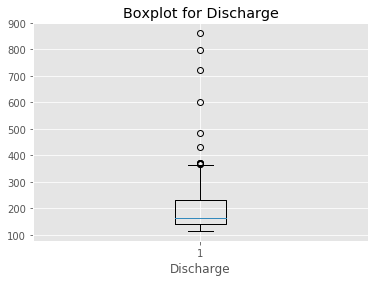

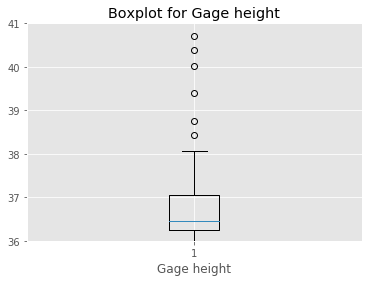

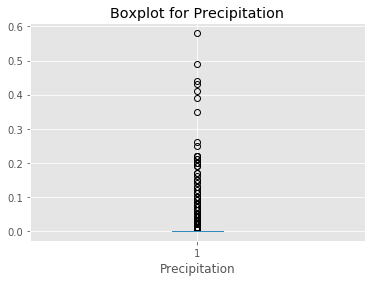

In [39]:
# df.boxplot(column=['Discharge(cft/sec)'])

plt.boxplot(df['Discharge(cft/sec)'][500:3060])#, showfliers=False
#plt.ylim((0,1200))
plt.xlabel("Discharge")
plt.title("Boxplot for Discharge")
plt.show()

plt.boxplot(df['gage height(feet)'][500:3060])
plt.ylim((36,41))
plt.xlabel("Gage height")
plt.title("Boxplot for Gage height")
plt.show()



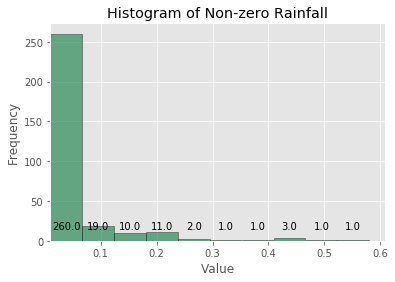

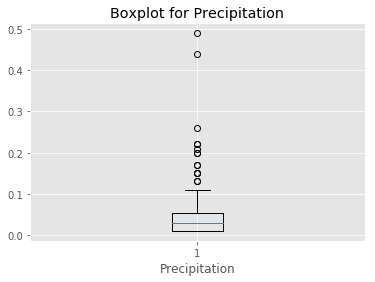

In [67]:

from matplotlib.ticker import PercentFormatter
from matplotlib import colors

x = df[df['precipitation(feet)']!=0]['precipitation(feet)']

rain = x.values

counts, bins, patches = plt.hist(x,color='seagreen',alpha=0.7,edgecolor='black',rwidth=0.99)
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    plt.annotate('{:.1f}'.format(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, 20), textcoords='offset points', va='top', ha='center')
    
plt.xlabel("Value")
plt.xlim(left=0.01)
plt.ylabel("Frequency")
plt.title("Histogram of Non-zero Rainfall")
plt.show()


# fig, axs = plt.subplots(1, 1, tight_layout=True)

# # N is the count in each bin, bins is the lower-limit of the bin
# N, bins, patches = axs.hist(x, bins='auto',alpha=0.7, rwidth=0.85,density=True)


# # We'll color code by height, but you could use any scalar
# fracs = N / N.max()


# # we need to normalize the data to 0..1 for the full range of the colormap
# norm = colors.Normalize(fracs.min(), fracs.max())

# # Now, we'll loop through our objects and set the color of each accordingly
# for thisfrac, thispatch in zip(fracs, patches):
#     color = plt.cm.viridis(norm(thisfrac))
#     thispatch.set_facecolor(color)

# plt.show()

plt.boxplot(rain[150:250])
plt.xlabel("Precipitation")
plt.title("Boxplot for Precipitation")
plt.show()

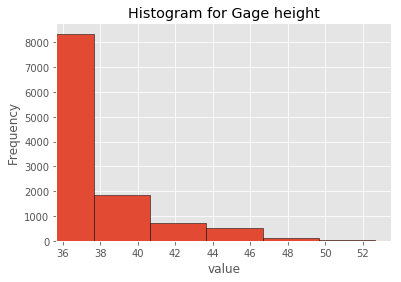

5150.0


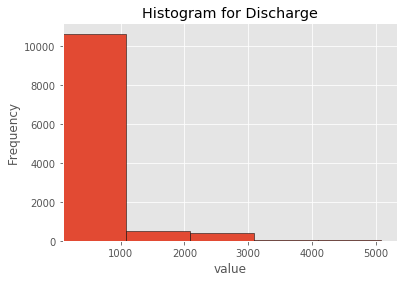

In [83]:
plt.hist(df['gage height(feet)'],edgecolor='black',bins=[35.66,37.66,40.66,43.66,46.66,49.66,52.66])
plt.xlim(left=35.66)
plt.xlabel("value")
plt.ylabel("Frequency")
plt.title("Histogram for Gage height")
plt.show()

print(max(df['Discharge(cft/sec)'].values))

plt.hist(df['Discharge(cft/sec)'],edgecolor='black',bins=[90.3,1090.3,2090.3,3090.3,4090.3,5090.3])
plt.xlim(left=90.3)
plt.xlabel("value")
plt.ylabel("Frequency")
plt.title("Histogram for Discharge")
plt.show()

In [85]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

file = '/content/drive/My Drive/Colab Notebooks/rain_sm_titusville.csv'#usgs_sm_lost_creek_final1.csv
df = pd.read_csv(file, engine='python')


columnTitles=['time','precipitation','soilMoisture'] #'SoilMoisture'


df = df.reindex(columns=columnTitles)

df = df.set_index('time')
print(df.describe())

coint_johansen(df,-1,1).eig

       precipitation  soilMoisture
count   12389.000000  12389.000000
mean        0.077424      0.218107
std         0.588639      0.063491
min         0.000000      0.128000
25%         0.000000      0.172000
50%         0.000000      0.196000
75%         0.000000      0.244000
max         9.800000      0.388000


array([2.62932547e-01, 1.87490256e-04])

In [0]:
trace = go.Heatmap(z=[df.corr().values[0,:], df.corr().values[1,:]],
                   x=['Precipitation', 'Soil Moisture'],
                   y=['Precipitation', 'Soil Moisture'])
data = [trace]
layout = go.Layout(title="Correlation Plot")
figure = go.Figure(data=data, layout=layout)
py.iplot(figure, title='labelled-heatmap')

print(df.corr())

               precipitation  soilMoisture
precipitation       1.000000      0.086919
soilMoisture        0.086919      1.000000


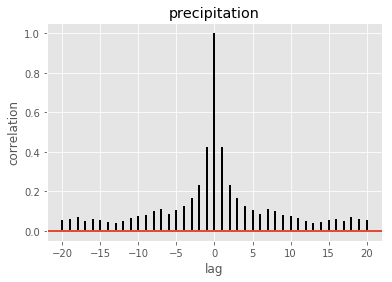

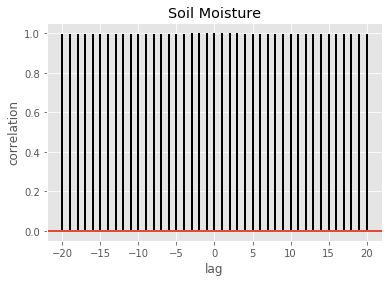

In [0]:
plt.acorr(df['precipitation'],usevlines=True, normed=True, maxlags=20, lw=2)
plt.xlabel("lag")
plt.ylabel("correlation")
plt.title("precipitation")
plt.show()

plt.acorr(df['soilMoisture'],usevlines=True, normed=True, maxlags=20, lw=2)
plt.xlabel("lag")
plt.ylabel("correlation")
plt.title("Soil Moisture")
plt.show()

In [0]:
trace1 = go.Scatter(y=df['precipitation'], x=df.index,name="Precipitation")
trace2 = go.Scatter(y=df['soilMoisture'], x=df.index,name="Soil Moisture")


fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Precipitation', 'Soil Moisture'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=600, title='Line Plots for ' +
                                                  'Titusville Dataset')

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



## **Instantiate Standard Scaler - Normalisation**

In [0]:

scaler  = StandardScaler()


In [0]:
# This function creates a sliding window of the dataset.
def create_dataset(dataset, sliding_window=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-sliding_window-1):
        a = dataset[i:(i+sliding_window), :]
        dataX.append(a)
        dataY.append(dataset[(i + sliding_window), :])
    return np.array(dataX), np.array(dataY)

## **Create samples using sliding window approach**

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    #print(agg)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    #print(agg)
    return agg

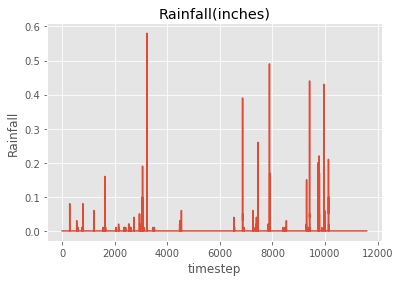

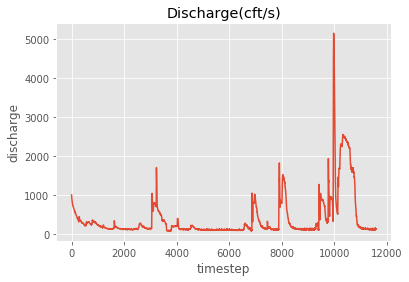

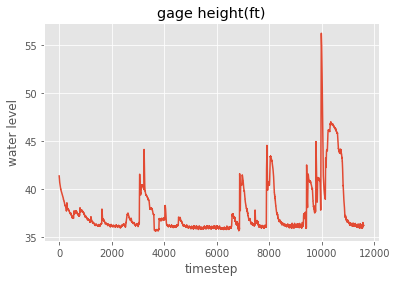

In [0]:
plt.plot(dataset[:,1])
plt.title("Rainfall(inches)")
plt.xlabel("timestep")
plt.ylabel("Rainfall")
plt.show()
plt.plot(dataset[:,0])
plt.title("Discharge(cft/s)")
plt.xlabel("timestep")
plt.ylabel("discharge")
plt.show()
plt.plot(dataset[:,2])
plt.title("gage height(ft)")
plt.xlabel("timestep")
plt.ylabel("water level")
plt.show()

In [0]:
df = series_to_supervised(dataset,4,1)
supervised_values = df.values

supervised_values_copy = supervised_values.copy()


In [0]:
df.corr()

,var1(t-4),var2(t-4),var3(t-4),var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t),var1(t+1),var2(t+1),var3(t+1),var1(t+2),var2(t+2),var3(t+2),var1(t+3),var2(t+3),var3(t+3)
var1(t-4),1.000000,0.104393,0.985585,0.999465,0.092238,0.985127,0.998067,0.083298,0.983934,0.995886,0.074755,0.982077,0.993042,0.065666,0.979670,0.989634,0.056626,0.976800,0.985754,0.049953,0.973547,0.981488,0.043959,0.969983
var2(t-4),0.104393,1.000000,0.099813,0.121357,0.492535,0.116764,0.140642,0.339647,0.135247,0.160502,0.239483,0.153566,0.177484,0.238322,0.168621,0.191627,0.216224,0.180551,0.202236,0.233879,0.189317,0.210176,0.208137,0.195764
var3(t-4),0.985585,0.099813,1.000000,0.985053,0.087202,0.999496,0.983723,0.078532,0.998294,0.981639,0.070732,0.996428,0.978920,0.062714,0.994013,0.975674,0.054484,0.991153,0.971995,0.048159,0.987930,0.967963,0.042237,0.984413
var1(t-3),0.999465,0.121357,0.985053,1.000000,0.104408,0.985586,0.999465,0.092253,0.985129,0.998067,0.083312,0.983935,0.995885,0.074769,0.982078,0.993041,0.065679,0.979670,0.989634,0.056639,0.976800,0.985753,0.049966,0.973546
var2(t-3),0.092238,0.492535,0.087202,0.104408,1.000000,0.099833,0.121372,0.492535,0.116784,0.140658,0.339647,0.135269,0.160518,0.239483,0.153589,0.177501,0.238322,0.168644,0.191644,0.216224,0.180575,0.202253,0.233879,0.189341
var3(t-3),0.985127,0.116764,0.999496,0.985586,0.099833,1.000000,0.985056,0.087221,0.999496,0.983725,0.078551,0.998294,0.981642,0.070750,0.996428,0.978923,0.062731,0.994013,0.975677,0.054501,0.991152,0.971997,0.048175,0.987929
var1(t-2),0.998067,0.140642,0.983723,0.999465,0.121372,0.985056,1.000000,0.104423,0.985588,0.999465,0.092267,0.985130,0.998067,0.083326,0.983936,0.995885,0.074782,0.982079,0.993041,0.065693,0.979670,0.989633,0.056652,0.976800
var2(t-2),0.083298,0.339647,0.078532,0.092253,0.492535,0.087221,0.104423,1.000000,0.099853,0.121388,0.492535,0.116805,0.140674,0.339647,0.135290,0.160534,0.239483,0.153611,0.177517,0.238322,0.168667,0.191661,0.216224,0.180598
var3(t-2),0.983934,0.135247,0.998294,0.985129,0.116784,0.999496,0.985588,0.099853,1.000000,0.985057,0.087241,0.999496,0.983728,0.078569,0.998294,0.981644,0.070768,0.996427,0.978925,0.062749,0.994012,0.975679,0.054518,0.991151
var1(t-1),0.995886,0.160502,0.981639,0.998067,0.140658,0.983725,0.999465,0.121388,0.985057,1.000000,0.104438,0.985590,0.999465,0.092281,0.985132,0.998067,0.083340,0.983937,0.995885,0.074796,0.982079,0.993040,0.065706,0.979670


## **Fit and transform the training data using the standard scaler. Reshape inputs so that the samples are in 3 dimensional and can be readily used by LSTM model**

In [0]:
np.random.shuffle(supervised_values)


train_len = int(len(supervised_values)*0.67)



train = supervised_values[:train_len,:]
test =  supervised_values[train_len:,:]

#scaler  = StandardScaler()

#val = scaler.fit_transform(dataset)


train = scaler.fit_transform(train)



test = scaler.transform(test)
    
trainX = train[:,0:4*3]
trainY = train[:,4*3:]

testX = test[:,0:4*3]
testY = test[:,4*3:]

trainX_shaped = trainX.reshape(len(trainX),4,3)
#trainY_shaped = trainY.reshape(len(trainY),4,3)
testX_shaped = testX.reshape(len(testX),4,3)
#testY_shaped = testY.reshape(len(testY),4,3)

print(scaler.inverse_transform(train)[:,-1])

[36.34 35.99 35.83 ... 37.42 37.35 36.84]


## **Visualisation and summary statistics of the distribution of target variable for test and train data**

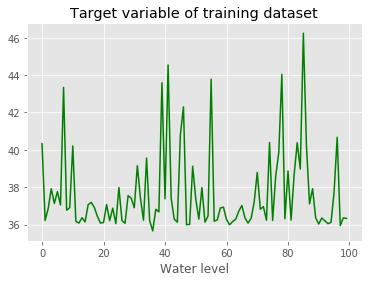

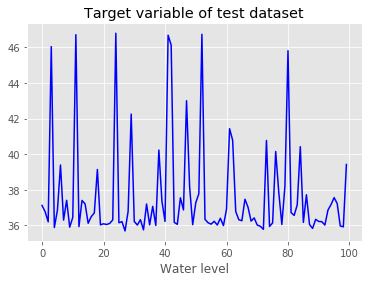

                 0
count  3823.000000
mean     37.685851
std       2.696607
min      35.660000
25%      36.140000
50%      36.450000
75%      37.855000
max      56.170000
                 0
count  7760.000000
mean     37.711570
std       2.749051
min      35.660000
25%      36.140000
50%      36.470000
75%      37.900000
max      56.190000


In [0]:
plt.plot(scaler.inverse_transform(train)[0:100,-1],color="green")
plt.title("Target variable of training dataset")
plt.xlabel("Samples")
plt.xlabel("Water level")
plt.show()
plt.plot(scaler.inverse_transform(test)[0:100,-1],color="blue")
plt.title("Target variable of test dataset")
plt.xlabel("Samples")
plt.xlabel("Water level")
plt.show()




print(pd.DataFrame(scaler.inverse_transform(test)[:,-1]).describe())
print(pd.DataFrame(scaler.inverse_transform(train)[:,-1]).describe())

## **LSTM model with 10 layers - one step ahead forecasting model**

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array
# define model
inputs1 = Input(shape=(4, 3))
lstm1, state_h, state_c = LSTM(64,return_sequences=True,return_state=True)(inputs1)
lstm_enco = LSTM(64)
output1 = lstm_enco(lstm1,initial_state=[state_h,state_c])
output = Dense(3, activation='relu')(output1)
model = Model(inputs=inputs1, outputs=[output])
model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mae'])
model.fit(trainX_shaped, trainY, batch_size = 100,epochs=100, verbose=2, validation_data=(testX_shaped,testY))
# define input data
#data = array([0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]).reshape((1,4,3))
# make and show prediction
#print(model.predict(data))

W0618 21:52:26.910722 140363032754048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 21:52:27.255267 140363032754048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0618 21:52:28.266074 140363032754048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0618 21:52:28.277003 140363032754048 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign

Train on 7760 samples, validate on 3823 samples
Epoch 1/100
 - 6s - loss: 0.3131 - mean_absolute_error: 0.3131 - val_loss: 0.2898 - val_mean_absolute_error: 0.2898
Epoch 2/100
 - 1s - loss: 0.2934 - mean_absolute_error: 0.2934 - val_loss: 0.2816 - val_mean_absolute_error: 0.2816
Epoch 3/100
 - 1s - loss: 0.2905 - mean_absolute_error: 0.2905 - val_loss: 0.2767 - val_mean_absolute_error: 0.2767
Epoch 4/100
 - 1s - loss: 0.2880 - mean_absolute_error: 0.2880 - val_loss: 0.2774 - val_mean_absolute_error: 0.2774
Epoch 5/100
 - 1s - loss: 0.2869 - mean_absolute_error: 0.2869 - val_loss: 0.2765 - val_mean_absolute_error: 0.2765
Epoch 6/100
 - 1s - loss: 0.2856 - mean_absolute_error: 0.2856 - val_loss: 0.2861 - val_mean_absolute_error: 0.2861
Epoch 7/100
 - 1s - loss: 0.2847 - mean_absolute_error: 0.2847 - val_loss: 0.2765 - val_mean_absolute_error: 0.2765
Epoch 8/100
 - 1s - loss: 0.2843 - mean_absolute_error: 0.2843 - val_loss: 0.2736 - val_mean_absolute_error: 0.2736
Epoch 9/100
 - 1s - loss

In [0]:
#Setup the LSTM
def create_model():

  from keras.utils.vis_utils import plot_model
  model = Sequential()
  model.add(LSTM(64, input_shape=(4,3),return_sequences = True))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(LSTM(64, return_sequences = True))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(LSTM(64)) # return_sequences = True -- add this to perform multi step ahead forecasting
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(3,activation='relu', use_bias=True)) #
  model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse', 'mae'])#adam
  plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/model_plot.png', show_shapes=True, show_layer_names=True)
  
  return model
#history = model.fit(trainX_shaped, trainY, batch_size = 20,epochs=100, verbose=2, validation_split = 0.1)

In [0]:
n_repeats = 10

from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(LSTM(64, input_shape=(4,3),use_bias=True))#return_sequences = True
#model.add(BatchNormalization())
#model.add(Activation('relu'))
# model.add(LSTM(64,use_bias=True, return_sequences = True))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(LSTM(64,use_bias=True,return_sequences = True)) # return_sequences = True -- add this to perform multi step ahead forecasting
# model.add(BatchNormalization())
model.add(Dense(3,activation='relu', use_bias=True))#TimeDistributed(Dense(3,activation='relu', use_bias=True))
model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mae'])#adam
plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/one_step_single_lstm.png', show_shapes=True, show_layer_names=True)

# tbCallBack = keras.callbacks.TensorBoard(log_dir='/content/drive/My Drive/Colab Notebooks/Graph', histogram_freq=0, write_graph=True, write_images=True)

# es = EarlyStopping(monitor='val_loss', mode='min', patience = 25,verbose=1)
for i in range(1):
  history = model.fit(trainX_shaped, trainY, batch_size = 100,epochs=30, verbose=2, validation_data=(testX_shaped,testY))#,callbacks=[es]
  print('%d) TrainRMSE=%f, TestRMSE=%f' % (i, math.sqrt(history.history['loss'][-1]), math.sqrt(history.history['val_loss'][-1])))

Train on 7760 samples, validate on 3823 samples
Epoch 1/30
 - 2s - loss: 0.3222 - mean_absolute_error: 0.3222 - val_loss: 0.2973 - val_mean_absolute_error: 0.2973
Epoch 2/30
 - 1s - loss: 0.2884 - mean_absolute_error: 0.2884 - val_loss: 0.2892 - val_mean_absolute_error: 0.2892
Epoch 3/30
 - 1s - loss: 0.2859 - mean_absolute_error: 0.2859 - val_loss: 0.2885 - val_mean_absolute_error: 0.2885
Epoch 4/30
 - 1s - loss: 0.2843 - mean_absolute_error: 0.2843 - val_loss: 0.2858 - val_mean_absolute_error: 0.2858
Epoch 5/30
 - 1s - loss: 0.2832 - mean_absolute_error: 0.2832 - val_loss: 0.2866 - val_mean_absolute_error: 0.2866
Epoch 6/30
 - 1s - loss: 0.2829 - mean_absolute_error: 0.2829 - val_loss: 0.2908 - val_mean_absolute_error: 0.2908
Epoch 7/30
 - 1s - loss: 0.2826 - mean_absolute_error: 0.2826 - val_loss: 0.2850 - val_mean_absolute_error: 0.2850
Epoch 8/30
 - 1s - loss: 0.2821 - mean_absolute_error: 0.2821 - val_loss: 0.2867 - val_mean_absolute_error: 0.2867
Epoch 9/30
 - 1s - loss: 0.2819 

## **Save model to file and print model summary**

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                17408     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 17,603
Trainable params: 17,603
Non-trainable params: 0
_________________________________________________________________
None


## **Plot training loss**

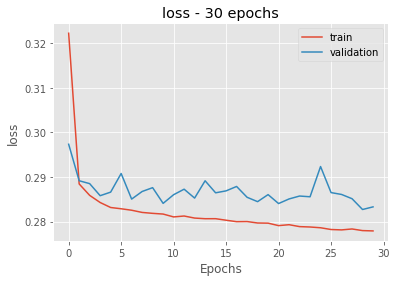

In [0]:
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.legend(loc="upper right")
plt.title("loss - 30 epochs")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

## **Calculate model metrics for training and test data**

In [0]:
#print(model.metrics_names)

# Print out the evaluation for both the
trainScore = model.evaluate(trainX_shaped, trainY, verbose=0)
print(trainScore)
#trainScore = math.sqrt(trainScore)
# print(trainScore)
#trainScore = scaler.inverse_transform(np.array([[trainScore]]))
print('Train Score: %.2f MAE' % (trainScore[0]))
testScore = model.evaluate(testX_shaped, testY, verbose=0)
# print(testScore)
#testScore = math.sqrt(testScore)
#testScore = scaler.inverse_transform(np.array([[testScore]]))
print('Test Score: %.2f MAE' % (testScore[0]))

[0.27602180082773425, 0.27602180082773425]
Train Score: 0.28 MAE
Test Score: 0.28 MAE


In [0]:
trainPredict = model.predict(trainX_shaped)
testPredict  = model.predict(testX_shaped)



test_X = testX_shaped.reshape((testX_shaped.shape[0], 12))



# invert scaling for forecast
inv_yhat = np.concatenate((test_X,testPredict.reshape(len(testPredict),3)), axis=1)
#.reshape(len(testPredict),12

#print(inv_yhat)


inv_yhat = scaler.inverse_transform(inv_yhat)

print(inv_yhat[:,-1])

test_inv = scaler.inverse_transform(test)
print(test_inv[:,-1])

print(math.sqrt(mean_squared_error(test_inv[:,-1],inv_yhat[:,-1])))  
print(mean_absolute_error(test_inv[:,-1],inv_yhat[:,-1]))

# plt.plot(trainPredict[:,3])
# plt.show()

from sklearn.metrics import r2_score


# print('r-2 score : %.2f' % (r2_score(trainY_shaped.[:,2],trainPredict[:,2])))
# print(mean_squared_error(test[:,14],inv_yhat[:,14]))
# print(mean_squared_error(test[:,17],inv_yhat[:,17]))
# print(mean_squared_error(test[:,20],inv_yhat[:,20]))
# print(mean_squared_error(test[:,23],inv_yhat[:,23]))

[40.89485072 40.0800101  40.92497097 ... 37.71485438 37.71485438
 39.23659745]
[40.95 40.1  40.95 ... 35.83 35.99 39.27]
1.1963433044882583
0.9814659347426435


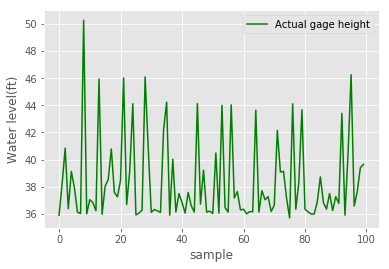

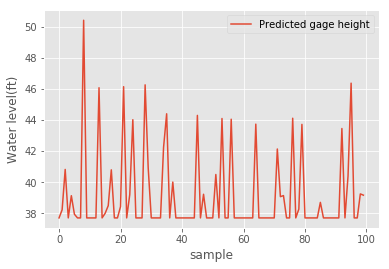

In [0]:
len1 = np.random.randint(0,len(test))

plt.plot(test_inv[len1:len1+100,-1],label="Actual gage height",color="green")
plt.legend(loc="upper right")
plt.xlabel("sample")
plt.ylabel("Water level(ft)")
plt.show()
plt.plot(inv_yhat[len1:len1+100,-1],label="Predicted gage height")
plt.legend(loc="upper right")
plt.xlabel("sample")
plt.ylabel("Water level(ft)")
plt.show()

# print(test[1000:1010,-1])
# print(inv_yhat[1000:1010,-1])

r-2 score : 0.80
r-2 score : 0.80
r-2 score : 0.80
r-2 score : 0.80


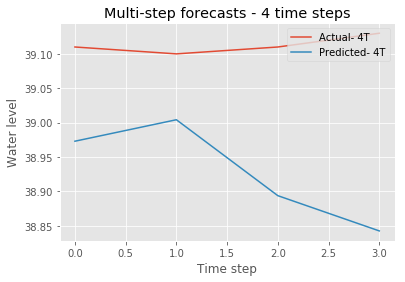

In [0]:
train_X = trainX_shaped.reshape((trainX_shaped.shape[0], 12))



# invert scaling for forecast
inv_yhat_train = np.concatenate((train_X,trainPredict.reshape((trainX_shaped.shape[0], 3))), axis=1)
#.reshape(len(testPredict),12

#print(inv_yhat)
train_inv = scaler.inverse_transform(train)

inv_yhat_train = scaler.inverse_transform(inv_yhat_train)


len1 = np.random.randint(0,len(test))
plt.plot(test[len1,[14,17,20,23]],label="Actual- 4T")
plt.plot(inv_yhat[len1,[14,17,20,23]],label="Predicted- 4T")
plt.title("Multi-step forecasts - 4 time steps")
plt.xlabel("Time step")
plt.ylabel("Water level")
plt.legend(loc="upper right")
plt.show()
# print(mean_squared_error(train[:,-1],inv_yhat_train[:,-1]))

## **This cell block is used to perform multi step ahead forecasts at different points in test data**

In [0]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    list_predictions = list()
    for i in range(int(len(testX)/10)):
      preds_moving = []                                    # Use this to store the prediction made on each test window
      
      #[testX[i,:].tolist()] 
      moving_test_window =  [testX[i*10]]        # Creating the first test window
      moving_test_window = np.array(moving_test_window)    # Making it an numpy array

      for i in range(n_future_preds):
          preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
          preds_moving.append(preds_one_step[0,:]) # get the value from the numpy 2D array and append to predictions
          preds_one_step = preds_one_step.reshape(1,1,4) # Reshaping the prediction to 3D array for concatenation with moving test window
          moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end

      preds_moving = scaler.inverse_transform(preds_moving)
      list_predictions.append(preds_moving)
    list_predictions = np.array(list_predictions)
    return list_predictions

## **This cell block is used to perform multi step ahead forecasts for a given sample in test data using predicted values - recursive strategy**

In [0]:
def moving_test_window_preds_full(n_future_preds,start_day):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    
    
    preds_moving = []                                    # Use this to store the prediction made on each test window

    #[testX[i,:].tolist()] 
    moving_test_window = look_aheadX_shaped[start_day,:].reshape(1,4,3)
#     moving_test_window =  [look_aheadX_shaped[start_day,:].tolist()]       # Creating the first test window
#     print(moving_test_window)
#     moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,:]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,3) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
    #print(type(preds_moving[0]))
    #preds_moving = scaler.inverse_transform(preds_moving)
      
    return preds_moving

## **This cell block is used to perform multi step ahead forecasts for a given sample in test data using actual values - Straightforward strategy**

In [0]:
def moving_test_window_preds_full_using_actual():

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    
    
    preds_moving = []                                    # Use this to store the prediction made on each test window
    

    for i in range(len(look_aheadX_shaped)):
      #print(look_aheadX_shaped[i,:].reshape(1,4,4))
      pred = model.predict(look_aheadX_shaped[i,:].reshape(1,4,3))[0,:]
      #print(pred)
      preds_moving.append(pred)
      
    return preds_moving

In [0]:
#df_new = series_to_supervised(dataset,4,10)
two_step_forecasts = []
two_step_Actual = []

for i in range(int(0.33*(len(supervised_values_copy)))):
  look_aheadX_shaped = scaler.transform(supervised_values_copy[i:i+4,:].reshape(4,-1))[:,0:12].reshape(4,4,3)
  preds = moving_test_window_preds_full_using_actual()
  preds_1 = np.asarray(preds)
  preds_2 = preds_1.astype("float64")
  preds_3 = preds_2[3,:]#1
  preds_4 = np.asarray(preds_3.reshape(1,3))
  preds_inv = np.concatenate((look_aheadX_shaped[1,:].reshape(1,12),preds_4), axis=1)
  preds_inv_y = scaler.inverse_transform(preds_inv)
  #print(preds_inv_y)
  two_step_forecasts.append(preds_inv_y[:,-1][0])
  two_step_Actual.append(supervised_values_copy[i+3,-1])

In [0]:
print(math.sqrt(mean_squared_error(two_step_Actual,two_step_forecasts)))

1.0549751426922507


In [0]:
print(math.sqrt(mean_squared_error(two_step_Actual,two_step_forecasts)))

1.0548971211258096


In [0]:
print(math.sqrt(mean_squared_error(two_step_Actual,two_step_forecasts)))

1.0548150690999087


In [0]:
#df_new = series_to_supervised(dataset,4,10)
two_step_forecasts = []
two_step_Actual = []

for i in range(int(0.33*(len(supervised_values_copy)))):
  look_aheadX_shaped = scaler.transform(supervised_values_copy[i,:].reshape(1,-1))[0,0:12].reshape(1,4,3)
  preds = moving_test_window_preds_full(4,0)
  preds_1 = np.asarray(preds)
  preds_2 = preds_1.astype("float64")
  preds_3 = preds_2[3,:]#1
  preds_4 = np.asarray(preds_3.reshape(1,3))
  preds_inv = np.concatenate((look_aheadX_shaped.reshape(1,12),preds_4), axis=1)
  preds_inv_y = scaler.inverse_transform(preds_inv)
  #print(preds_inv_y)
  two_step_forecasts.append(preds_inv_y[:,-1][0])
  two_step_Actual.append(supervised_values_copy[i+3,-1])
  


In [0]:

print(math.sqrt(mean_squared_error(two_step_Actual,two_step_forecasts)))


1.3535489193734278


In [0]:
print(math.sqrt(mean_squared_error(two_step_Actual,two_step_forecasts)))


1.7055515029428057


In [0]:
print(math.sqrt(mean_squared_error(two_step_Actual,two_step_forecasts)))

2.052413067708441


In [0]:
print(math.sqrt(mean_squared_error(two_step_Actual,two_step_forecasts)))

1.054739026631948


In [0]:
print(two_step_Actual)
print(two_step_forecasts)

[41.22, 41.19, 41.17, 41.13, 41.08, 41.06, 41.02, 40.98, 40.96, 40.92, 40.89, 40.84, 40.82, 40.78, 40.75, 40.72, 40.69, 40.67, 40.63, 40.6, 40.57, 40.54, 40.52, 40.49, 40.47, 40.45, 40.43, 40.4, 40.38, 40.36, 40.33, 40.32, 40.3, 40.29, 40.27, 40.25, 40.23, 40.23, 40.21, 40.2, 40.19, 40.16, 40.16, 40.14, 40.14, 40.13, 40.12, 40.12, 40.11, 40.08, 40.05, 40.05, 40.03, 40.02, 39.99, 40.0, 39.97, 39.96, 39.95, 39.94, 39.92, 39.92, 39.9, 39.9, 39.86, 39.86, 39.85, 39.85, 39.83, 39.83, 39.81, 39.8, 39.79, 39.78, 39.77, 39.76, 39.76, 39.76, 39.74, 39.73, 39.72, 39.71, 39.7, 39.7, 39.68, 39.68, 39.67, 39.66, 39.65, 39.63, 39.64, 39.61, 39.62, 39.6, 39.58, 39.57, 39.56, 39.56, 39.54, 39.54, 39.52, 39.5, 39.49, 39.49, 39.49, 39.47, 39.46, 39.45, 39.44, 39.42, 39.41, 39.39, 39.37, 39.39, 39.37, 39.36, 39.34, 39.32, 39.31, 39.31, 39.3, 39.3, 39.27, 39.29, 39.26, 39.26, 39.25, 39.23, 39.22, 39.23, 39.21, 39.22, 39.2, 39.19, 39.22, 39.18, 39.2, 39.17, 39.16, 39.15, 39.16, 39.14, 39.13, 39.14, 39.13, 

## **Randomly sample an index from dataset and perform multi step ahead forecasting using predictions and actuals - forecast horizon = 10. Plot the true values.**

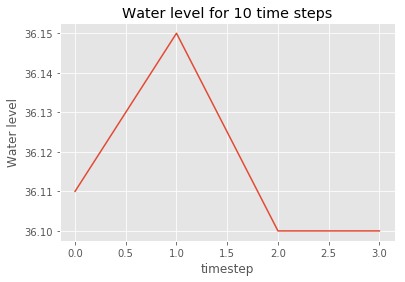

In [0]:
len1 = np.random.randint(0,len(supervised_values_copy))


look_ahead_forecast_actual_list = supervised_values_copy[len1:len1+4,:]


plt.plot(look_ahead_forecast_actual_list[:,-1])
plt.title("Water level for 10 time steps")
plt.xlabel("timestep")
plt.ylabel("Water level")
plt.show()


look_ahead_forecast_actual_list_tranformed = scaler.transform(look_ahead_forecast_actual_list)

look_aheadX = look_ahead_forecast_actual_list_tranformed[:,0:12]
look_aheadY = look_ahead_forecast_actual_list_tranformed[:,12:]


look_aheadX_shaped = look_aheadX.reshape(len(look_aheadX),4,3)

## **Plot the predictions of the model using recursive strategy and straightforward strategy along with the true values of target variable**

<class 'numpy.ndarray'>


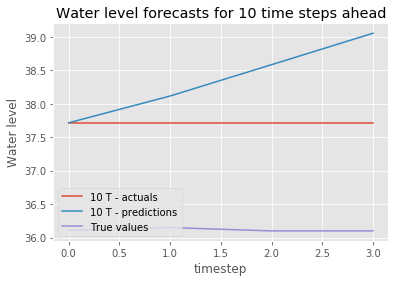

1.5999872005185953
2.308672720623513
[36.11 36.15 36.1  36.1 ]
[37.71485438 37.71485438 37.71485438 37.71485438]
[37.71485438 38.11522234 38.58304988 39.05240339]


In [0]:
predictions = moving_test_window_preds_full(4,0)

# print(look_ahead_forecast_actual_list)

predictions = np.asarray(predictions)
predictions = predictions.astype("float64")

#predictions = predictions.reshape(len(predictions),1,4)



inv_yhat_multiple = np.concatenate((look_aheadX,predictions), axis=1)

inv_yhat_multiple = scaler.inverse_transform(inv_yhat_multiple)


predictions_Using_actuals =  moving_test_window_preds_full_using_actual()
predictions_Using_actuals = np.asarray(predictions_Using_actuals)

predictions_Using_actuals = predictions_Using_actuals.astype("float64")

# print(predictions)

# print(predictions_Using_actuals)

inv_yhat_actuals = np.concatenate((look_aheadX,predictions_Using_actuals), axis=1)
inv_yhat_actuals = scaler.inverse_transform(inv_yhat_actuals)

plt.plot(inv_yhat_actuals[:,-1],label="10 T - actuals")
plt.plot(inv_yhat_multiple[:,-1],label="10 T - predictions")
plt.plot(look_ahead_forecast_actual_list[:,-1],label="True values")
plt.title("Water level forecasts for 10 time steps ahead")
plt.xlabel("timestep")
plt.ylabel("Water level")
plt.legend(loc="lower left")
plt.show()

print(math.sqrt(mean_squared_error(look_ahead_forecast_actual_list[:,-1],inv_yhat_actuals[:,-1])))
print(math.sqrt(mean_squared_error(look_ahead_forecast_actual_list[:,-1],inv_yhat_multiple[:,-1])))
print(look_ahead_forecast_actual_list[:,-1])

print(inv_yhat_actuals[:,-1])
print(inv_yhat_multiple[:,-1])

## **Preparing training dataset for Encoder Decoder model**

In [0]:
df_new = series_to_supervised(dataset,4,4)

supervised_values_new = df_new.values

supervised_values_new_copy = supervised_values_new.copy()

np.random.shuffle(supervised_values_new)


train_len1 = int(len(supervised_values_new)*0.67)



train1 = supervised_values_new[:train_len1,:]
test1 =  supervised_values_new[train_len1:,:]

scaler1  = StandardScaler()

#val = scaler.fit_transform(dataset)


train1 = scaler1.fit_transform(train1)



test1 = scaler1.transform(test1)
    
trainX_new = train1[:,0:4*3]
trainY_new = train1[:,4*3:]

testX_new = test1[:,0:4*3]
testY_new = test1[:,4*3:]



In [0]:
trainX_shaped_new = trainX_new.reshape(len(trainX_new),4,3)
trainY_shaped_new = trainY_new.reshape(len(trainY_new),4,3)
testX_shaped_new = testX_new.reshape(len(testX_new),4,3)
testY_shaped_new = testY_new.reshape(len(testY_new),4,3)

print(scaler1.inverse_transform(test1)[:,-1])

[35.99 37.4  36.08 ... 41.   39.68 36.94]


# **Encoder Decoder model for Multi-step ahead forecasting**

In [0]:
model1 = Sequential()
model1.add(LSTM(200, activation='relu', input_shape=(4, 3)))
model1.add(RepeatVector(4))
model1.add(LSTM(200, activation='relu', return_sequences=True))
model1.add(TimeDistributed(Dense(3)))
model1.compile(optimizer='adam', loss='mse')

history1 = model1.fit(trainX_shaped_new, trainY_shaped_new, batch_size = 20,epochs=100, verbose=2,validation_data=(testX_shaped_new,testY_shaped_new))



Train on 7758 samples, validate on 3822 samples
Epoch 1/100
 - 10s - loss: 0.4670 - val_loss: 0.2210
Epoch 2/100
 - 7s - loss: 0.3124 - val_loss: 0.1951
Epoch 3/100
 - 7s - loss: 0.3006 - val_loss: 0.1923
Epoch 4/100
 - 7s - loss: 0.2954 - val_loss: 0.1883
Epoch 5/100
 - 7s - loss: 0.3047 - val_loss: 0.1975
Epoch 6/100
 - 7s - loss: 0.2883 - val_loss: 0.1964
Epoch 7/100
 - 7s - loss: 0.2971 - val_loss: 0.1996
Epoch 8/100
 - 7s - loss: 0.2935 - val_loss: 0.1918
Epoch 9/100
 - 7s - loss: 0.2907 - val_loss: 0.1989
Epoch 10/100
 - 7s - loss: 0.2895 - val_loss: 0.1980
Epoch 11/100
 - 7s - loss: 0.2843 - val_loss: 0.1943
Epoch 12/100
 - 7s - loss: 0.2794 - val_loss: 0.2008
Epoch 13/100
 - 7s - loss: 0.2805 - val_loss: 0.1942
Epoch 14/100
 - 7s - loss: 0.2902 - val_loss: 0.1957
Epoch 15/100
 - 7s - loss: 0.2869 - val_loss: 0.1818
Epoch 16/100
 - 7s - loss: 0.2843 - val_loss: 0.1858
Epoch 17/100
 - 7s - loss: 0.2787 - val_loss: 0.1894
Epoch 18/100
 - 7s - loss: 0.2708 - val_loss: 0.1943
Epoch 

## **Plot training loss**

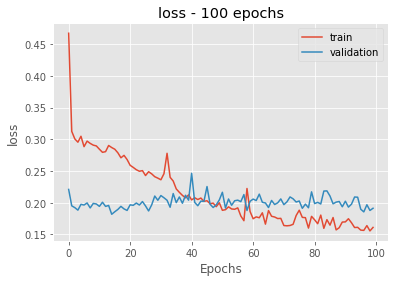

In [0]:
plt.plot(history1.history['loss'],label="train")
plt.plot(history1.history['val_loss'],label="validation")
plt.legend(loc="upper right")
plt.title("loss - 100 epochs")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

## **Encoder Decoder model**

In [0]:
print(model1.summary())

#model1.save_weights("/content/drive/My Drive/Colab Notebooks/encDec_8.h5")


model_json = model1.to_json()
with open("/content/drive/My Drive/Colab Notebooks/encDec_8_other.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("/content/drive/My Drive/Colab Notebooks/encDec_8_other.h5")
print("Saved model to disk")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 200)               163200    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 8, 200)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 8, 200)            320800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 8, 3)              603       
Total params: 484,603
Trainable params: 484,603
Non-trainable params: 0
_________________________________________________________________
None
Saved model to disk


## **Model metrics for training and test data**

In [0]:
testScore = model1.evaluate(testX_shaped_new, testY_shaped_new, verbose=0)
#print(testScore)
print('Test Score: %.2f RMSE' % (math.sqrt(testScore)))

trainScore = model1.evaluate(trainX_shaped_new, trainY_shaped_new, verbose=0)
#print(trainScore)

print('Train Score: %.2f RMSE' % (math.sqrt(trainScore)))

Test Score: 0.44 RMSE
Train Score: 0.41 RMSE


## **Plot 10 Time step ahead predictions of Encoder Decoder Model**

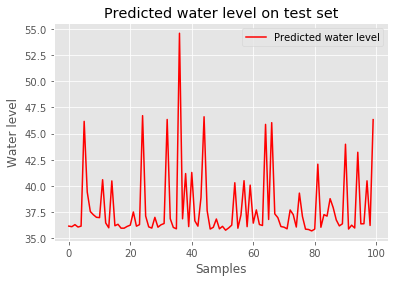

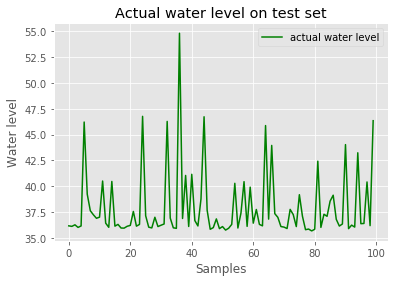

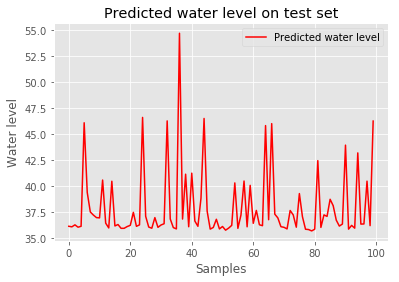

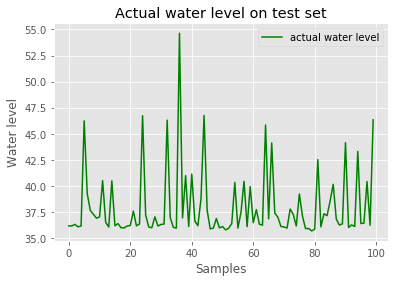

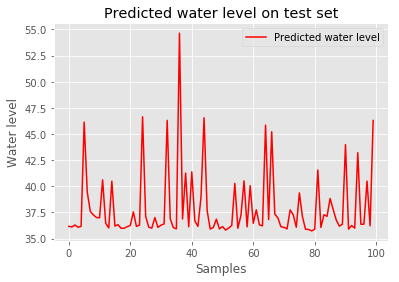

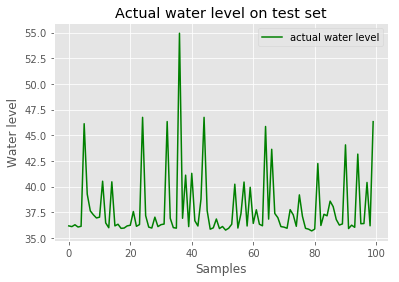

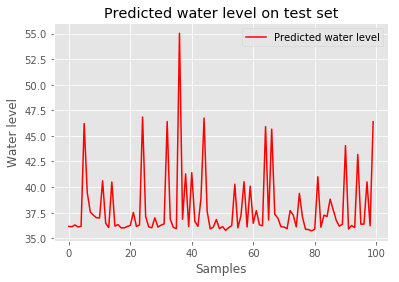

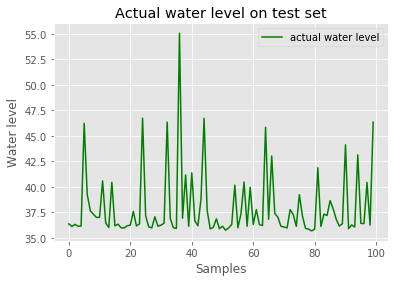

[36.36 36.11 36.31 36.13 36.14 46.22 39.25 37.64 37.31 36.99 37.   40.57
 36.46 36.01 40.44 36.17 36.33 35.98 35.96 36.18 36.23 37.58 36.16 36.36
 46.72 37.15 36.06 35.97 37.05 36.13 36.24 36.42 46.34 36.9  35.99 35.91
 55.05 36.91 41.16 36.12 41.36 36.66 36.17 38.79 46.71 37.69 35.87 36.01
 36.86 35.89 36.13 35.74 35.97 36.31 40.16 35.98 37.33 40.46 36.13 39.95
 36.3  37.76 36.29 36.2  45.83 36.81 43.02 37.38 37.02 36.13 36.05 35.96
 37.76 37.28 36.12 39.22 37.12 35.92 35.84 35.67 35.85 41.86 36.11 37.32
 37.18 38.64 37.83 36.8  36.14 36.38 44.11 35.89 36.26 36.06 43.13 36.41
 36.38 40.42 36.23 46.33]
[36.18 36.11 36.29 36.07 36.14 46.13 39.27 37.64 37.26 36.95 37.03 40.53
 36.47 36.   40.47 36.18 36.34 35.94 35.97 36.18 36.24 37.58 36.14 36.31
 46.75 37.18 36.06 35.97 37.03 36.11 36.3  36.36 46.34 36.92 36.01 35.96
 54.94 36.92 41.12 36.11 41.3  36.68 36.17 38.79 46.75 37.67 35.86 35.99
 36.85 35.92 36.12 35.77 35.95 36.34 40.24 35.97 37.37 40.45 36.17 39.94
 36.42 37.75 36.34 36.19 

In [0]:
pred_y = model1.predict(testX_shaped_new)


testX_reshape = testX_shaped_new.reshape(len(testX_shaped_new),12)

pred_y_reshape = pred_y.reshape(len(pred_y),12)


preds_inv = scaler1.inverse_transform(np.concatenate((testX_reshape,pred_y_reshape),axis=1))


test1_inv = scaler1.inverse_transform(test1)
len1 = np.random.randint(0,len(test))

plt.plot(preds_inv[len1:len1+100,20],label="Predicted water level",color="red")
plt.legend(loc= "upper right")
plt.title("Predicted water level on test set")
plt.xlabel("Samples")
plt.ylabel("Water level")
plt.show()
plt.plot(test1_inv[len1:len1+100,20],label="actual water level",color="green")
plt.legend(loc= "upper right")
plt.title("Actual water level on test set")
plt.xlabel("Samples")
plt.ylabel("Water level")
plt.show()

plt.plot(preds_inv[len1:len1+100,23],label="Predicted water level",color="red")
plt.legend(loc= "upper right")
plt.title("Predicted water level on test set")
plt.xlabel("Samples")
plt.ylabel("Water level")
plt.show()
plt.plot(test1_inv[len1:len1+100,23],label="actual water level",color="green")
plt.legend(loc= "upper right")
plt.title("Actual water level on test set")
plt.xlabel("Samples")
plt.ylabel("Water level")
plt.show()

plt.plot(preds_inv[len1:len1+100,17],label="Predicted water level",color="red")
plt.legend(loc= "upper right")
plt.title("Predicted water level on test set")
plt.xlabel("Samples")
plt.ylabel("Water level")
plt.show()
plt.plot(test1_inv[len1:len1+100,17],label="actual water level",color="green")
plt.legend(loc= "upper right")
plt.title("Actual water level on test set")
plt.xlabel("Samples")
plt.ylabel("Water level")
plt.show()

plt.plot(preds_inv[len1:len1+100,14],label="Predicted water level",color="red")
plt.legend(loc= "upper right")
plt.title("Predicted water level on test set")
plt.xlabel("Samples")
plt.ylabel("Water level")
plt.show()
plt.plot(test1_inv[len1:len1+100,14],label="actual water level",color="green")
plt.legend(loc= "upper right")
plt.title("Actual water level on test set")
plt.xlabel("Samples")
plt.ylabel("Water level")
plt.show()

[40.96923023 37.96311081 36.86997648 ... 36.0298825  41.00971669
 37.05216553]
[41.05578932 37.90234933 36.80688336 ... 36.04660307 41.15683078
 37.03099768]
[40.94291483 37.94362819 36.82902842 ... 35.99814496 41.02397663
 37.07221382]
[41.02861859 37.94403995 36.81966352 ... 36.00161031 41.13673325
 37.03049782]
r-2 score : 0.01
r-2 score : 0.02
r-2 score : 0.01
r-2 score : 0.02


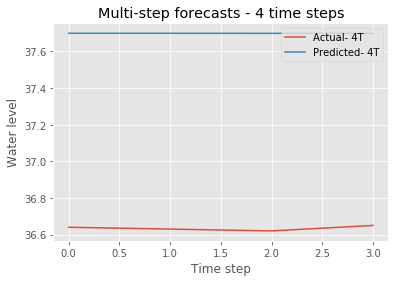

In [0]:
train_X_new = trainX_shaped_new.reshape((trainX_shaped_new.shape[0], 12))

train_predict = model1.predict(trainX_shaped_new)

# invert scaling for forecast
inv_yhat_train_new = np.concatenate((train_X_new,train_predict.reshape((train_predict.shape[0], 12))), axis=1)
#.reshape(len(testPredict),12

#print(inv_yhat)
train_inv_new = scaler.inverse_transform(train1)

inv_yhat_train_new = scaler.inverse_transform(inv_yhat_train_new)

print(train_inv_new[:,14])
print(inv_yhat_train_new[:,14])

print(train_inv_new[:,20])
print(inv_yhat_train_new[:,20])



print('r-2 score : %.2f' % (mean_squared_error(train_inv_new[:,14],inv_yhat_train_new[:,14])))

print('r-2 score : %.2f' % (mean_squared_error(train_inv_new[:,17],inv_yhat_train_new[:,17])))
print('r-2 score : %.2f' % (mean_squared_error(train_inv_new[:,20],inv_yhat_train_new[:,20])))
print('r-2 score : %.2f' % (mean_squared_error(train_inv_new[:,23],inv_yhat_train_new[:,23])))
len1 = np.random.randint(0,len(test))
plt.plot(test[len1,[14,17,20,23]],label="Actual- 4T")
plt.plot(inv_yhat[len1,[14,17,20,23]],label="Predicted- 4T")
plt.title("Multi-step forecasts - 4 time steps")
plt.xlabel("Time step")
plt.ylabel("Water level")
plt.legend(loc="upper right")
plt.show()
# print(mean_squared_error(train[:,-1],inv_yhat_train[:,-1]))

In [0]:
print('Test Score for time step t: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,19],preds_inv[:,19]))))

print('Test Score for time step t + 1: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,23],preds_inv[:,23]))))



print('Test Score for time step t + 2: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,27],preds_inv[:,27]))))

print('Test Score for time step t + 3: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,31],preds_inv[:,31]))))



print('Test Score for time step t + 4: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,35],preds_inv[:,35]))))

print('Test Score for time step t + 5: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,39],preds_inv[:,39]))))


print('Test Score for time step t + 6: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,43],preds_inv[:,43]))))

print('Test Score for time step t + 7: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,47],preds_inv[:,47]))))


print('Test Score for time step t + 8: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,51],preds_inv[:,51]))))

print('Test Score for time step t + 9: %f RMSE' %(math.sqrt(mean_squared_error(test1_inv[:,55],preds_inv[:,51]))))

Test Score for time step t: 0.008044 RMSE
Test Score for time step t + 1: 0.008211 RMSE
Test Score for time step t + 2: 0.008933 RMSE
Test Score for time step t + 3: 0.009983 RMSE
Test Score for time step t + 4: 0.011586 RMSE
Test Score for time step t + 5: 0.010954 RMSE
Test Score for time step t + 6: 0.010738 RMSE
Test Score for time step t + 7: 0.010775 RMSE
Test Score for time step t + 8: 0.011097 RMSE
Test Score for time step t + 9: 0.011451 RMSE


## ***Comparison of models - 10 time step ahead predictions using  Encoder Decoder model  and one step ahead forecasting model ***

In [0]:

# predictions = moving_test_window_preds(10)

# fig = plt.figure(facecolor='white')
# ax = fig.add_subplot(111)
# ax.plot(testY_transformed, label='True Data')
# # Pad the list of predictions to shift it in the graph to it's correct start
# for i, data in enumerate(predictions):
#   padding = []
#   for j in range((i+1) * 10):
#     padding.append(None)
#   for k in range(len(data[:,3])):
#     padding.append(data[k,3]) 
#   #print(padding)
#   plt.plot(padding , label='Prediction')
#   plt.legend()
#   plt.show()